In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [102]:
bikes =pd.read_csv('h.csv')

In [103]:
bikes

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [104]:
#Note: drop function acts on row, so specify the axis.
bikes_prep =bikes.copy()
bikes_prep =bikes_prep.drop(['index','date','casual','registered'], axis=1)

In [105]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [106]:
bikes_prep.isnull().sum() #checking for null values

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

In [ ]:
#continous variables are temp,atemp,humidity,windspeed and demand
#season- 1.spring 2.summer 3. fall 4. winter
## Holiday- 1.yes 0.No
# working day - 0.No 1.Yes
#weather- 1. Clear,few clouds,partlyy cloudy, 2- mist+clody, mist+ broken clouds,misy_few clouds,mist 3. light snow,lighr rain+thunderstorm+ scattere clouds,light rain+ scattered clouds 4. heavy rain+ ice pallets+thunderstorm+mist,snow+fog

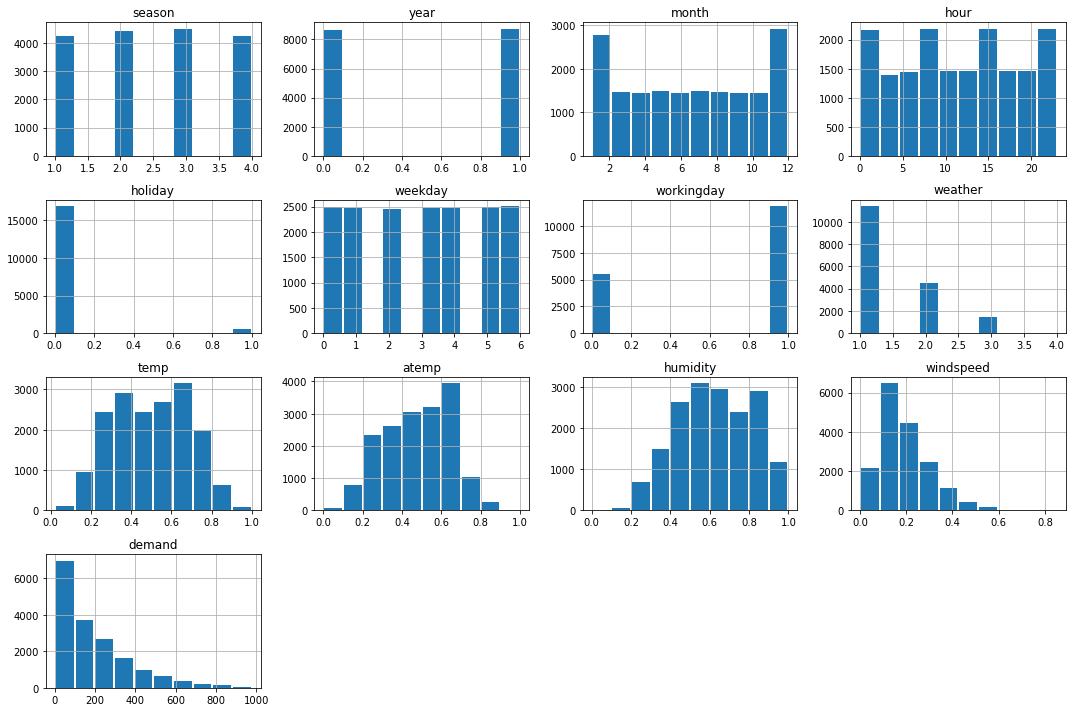

In [107]:
# visualise the data using pandas histogram
bikes_prep.hist(rwidth=0.9 , figsize=(15,10))
plt.tight_layout() #to remove overlapping in graphs

In [ ]:
#as per the above graphs it is visible that:
#Predicted value of demand is not normally distributed
## so we have to form transformation to make it normally distributed such as log or min/max transformation
# temperature and demand appears to have direct correlation
## the plot of atemp and temp have identical plots
# multi-collinearity need to check between temp and atemp
#Humidity actuall shows no affect on demand but wind speed affect to some extend need more statistical analysiss


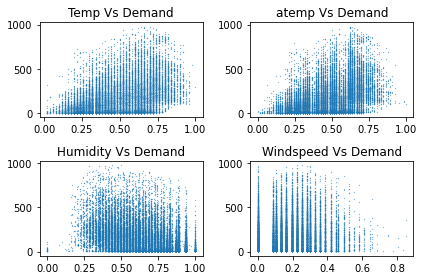

In [108]:
#visualise the continous features Vs Demand
plt.subplot(2,2,1)
plt.title('Temp Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=0.05)

plt.subplot(2,2,2)
plt.title('atemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=0.05)

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=0.05)

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=0.05)

plt.tight_layout()



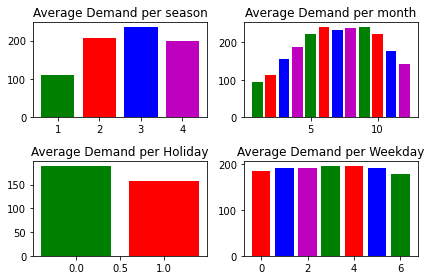

In [109]:
#visualising categorical variables
plt.subplot(2,2,1)
plt.title('Average Demand per season')
cat_list=bikes_prep['season'].unique() #unique values from the column (x-axis)
cat_average=bikes_prep.groupby('season').mean()['demand']
colors=['g','r','b','m']
plt.bar(cat_list,cat_average, color=colors)

plt.subplot(2,2,2)
plt.title('Average Demand per month')
cat_list=bikes_prep['month'].unique() #unique values from the column (x-axis)
cat_average=bikes_prep.groupby('month').mean()['demand']
colors=['g','r','b','m']
plt.bar(cat_list,cat_average, color=colors)

plt.subplot(2,2,3)
plt.title('Average Demand per Holiday')
cat_list=bikes_prep['holiday'].unique() #unique values from the column (x-axis)
cat_average=bikes_prep.groupby('holiday').mean()['demand']
colors=['g','r','b','m']
plt.bar(cat_list,cat_average, color=colors)

plt.subplot(2,2,4)
plt.title('Average Demand per Weekday')
cat_list=bikes_prep['weekday'].unique() #unique values from the column (x-axis)
cat_average=bikes_prep.groupby('weekday').mean()['demand']
colors=['g','r','b','m']
plt.bar(cat_list,cat_average, color=colors)

plt.tight_layout()


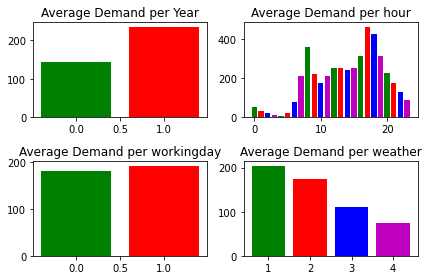

In [110]:
plt.subplot(2,2,1)
plt.title('Average Demand per Year')
cat_list=bikes_prep['year'].unique() #unique values from the column (x-axis)
cat_average=bikes_prep.groupby('year').mean()['demand']
colors=['g','r','b','m']
plt.bar(cat_list,cat_average, color=colors)

plt.subplot(2,2,2)
plt.title('Average Demand per hour')
cat_list=bikes_prep['hour'].unique() #unique values from the column (x-axis)
cat_average=bikes_prep.groupby('hour').mean()['demand']
colors=['g','r','b','m']
plt.bar(cat_list,cat_average, color=colors)

plt.subplot(2,2,3)
plt.title('Average Demand per workingday')
cat_list=bikes_prep['workingday'].unique() #unique values from the column (x-axis)
cat_average=bikes_prep.groupby('workingday').mean()['demand']
colors=['g','r','b','m']
plt.bar(cat_list,cat_average, color=colors)

plt.subplot(2,2,4)
plt.title('Average Demand per weather')
cat_list=bikes_prep['weather'].unique() #unique values from the column (x-axis)
cat_average=bikes_prep.groupby('weather').mean()['demand']
colors=['g','r','b','m']
plt.bar(cat_list,cat_average, color=colors)
plt.tight_layout()

<BarContainer object of 24 artists>

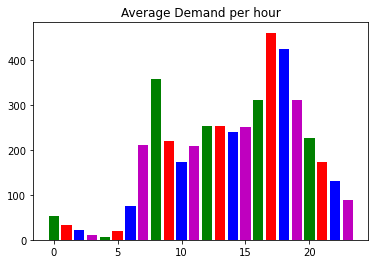

In [112]:
# features to be dropped weekdays,year,workingday,atemp,windspeed
## In hourly variation, it is visible that bikes need to be parked near public transaportation in morning and near offices in afternoon
plt.title('Average Demand per hour')
cat_list=bikes_prep['hour'].unique() #unique values from the column (x-axis)
cat_average=bikes_prep.groupby('hour').mean()['demand']
colors=['g','r','b','m']
plt.bar(cat_list,cat_average, color=colors)


In [113]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [114]:
# to check various percentile value
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.8,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.80    321.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [115]:
#checking multiple linear regression assumption
## test multicollinearity
corr =bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()
corr

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [116]:
bikes_prep=bikes_prep.drop(['atemp','windspeed','year','weekday','workingday'],axis=1)
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.4547474 , 0.4704958 , 0.49622864, 0.4940412 , 0.46795967,
        0.4773207 , 0.526758  , 0.59145766, 0.6520162 , 0.7151964 ,
        0.8059114 , 0.92531085, 1.        , 0.92531073, 0.8059114 ,
        0.7151964 , 0.6520162 , 0.59145766, 0.526758  , 0.4773207 ,
        0.46795967, 0.4940412 , 0.49622864, 0.47049585, 0.4547474 ],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x18de5387dc0>)

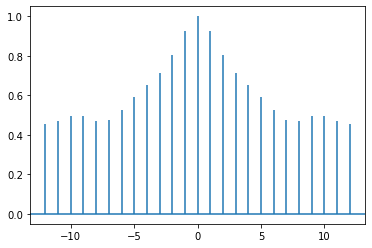

In [117]:
#test for autocorrelation
df=pd.to_numeric(bikes_prep['demand'],downcast='float')
plt.acorr(df,maxlags=12)
#as we are dealing with 24 hours
# there is high autocorrelation for the demand feature 

In [118]:
## demand is not normally distributed
## demand graph resembles the log normal graph
## we will convert demand values in logarithmic function to analyse the results
df1=bikes_prep['demand']
df2=np.log(df1)

In [119]:
df2

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: demand, Length: 17379, dtype: float64

<AxesSubplot:>

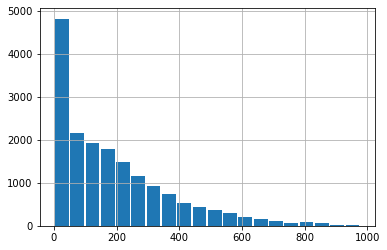

In [120]:
plt.figure()
df1.hist(rwidth=0.9,bins=20)

<AxesSubplot:>

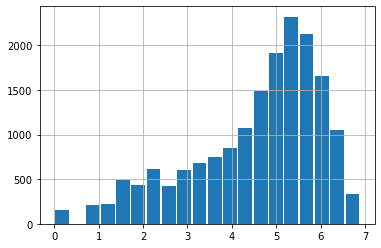

In [121]:
plt.figure()
df2.hist(rwidth=0.9,bins=20) #somewhat skewed but resemble the normal distribution tendency

In [122]:
bikes_prep['demand']=np.log(bikes_prep['demand'])

In [123]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123
17375,1,12,20,0,2,0.26,0.60,4.488636
17376,1,12,21,0,1,0.26,0.60,4.499810
17377,1,12,22,0,1,0.26,0.56,4.110874


In [124]:
t_1 =bikes_prep['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

In [125]:
t_2 =bikes_prep['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

In [126]:
t_3 =bikes_prep['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

In [127]:
bikes_prep_lag =pd.concat([bikes_prep,t_1,t_2,t_3], axis=1)

In [128]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [129]:
bikes_prep_lag = bikes_prep_lag.dropna()

In [133]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [134]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')

<ipython-input-134-8b29902c2587>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')


In [136]:
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')

<ipython-input-136-07d9013fc33d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
<ipython-input-136-07d9013fc33d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
<ipython-input-136-07d9013fc33d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [137]:
bikes_prep_lag.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [138]:
bikes_prep_lag = pd.get_dummies(bikes_prep_lag,drop_first=True)


In [139]:
bikes_prep_lag #creating dummies or say hot encoding and keeping in mind the assumption for regression model

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [140]:
## creating train and test split
## split the X and Y dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=1234)

NameError: name 'X' is not defined

In [141]:
#demand is the time dependent series
Y =bikes_prep_lag[['demand']]
X =bikes_prep_lag.drop(['demand'],axis=1)

In [142]:
tr_size =0.7* len(X)

In [143]:
tr_size=int(tr_size)

In [144]:
X_train=X.values[0:tr_size]

In [145]:
X_test = X.values[tr_size:len(X)]

In [146]:
Y_train = Y.values[0:tr_size]

In [148]:
Y_test = Y.values[tr_size:len(Y)]

In [149]:
#create and train multiple regression model
from sklearn.linear_model import LinearRegression
#create regressor
std_reg = LinearRegression()
#train or fit the training data
std_reg.fit(X_train,Y_train)

LinearRegression()

In [150]:
r2_train = std_reg.score(X_train,Y_train)
re_test = std_reg.score(X_test,Y_test)

In [151]:
V_predict =std_reg.predict(X_test)

In [152]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test,V_predict))
rmse

0.3809880049817043

In [154]:
##Calculate RMSLE
Y_test_e =[]
Y_predict_e =[]
for i in range(0,len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(V_predict[i]))
    

In [156]:
log_sq_sum =0.0
for i in range(0,len(Y_test_e)):
    log_a = math.log(Y_test_e[i]+1)
    log_p = math.log(V_predict[i]+1)
    log_diff =(log_p - log_a)**2
    log_sq_sum =log_sq_sum + log_diff
rmsle =math.sqrt(log_sq_sum/len(Y_test))

In [157]:
rmsle

3.4119761418839745